# Multiple Linear Regression

The multiple linear regression is the relationship between dependent and independent variable by creating a best fit line. Aim of best fit line is to reduce the cost or loss.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the dataset, File name 50_Startups.csv
dataset = pd.read_csv('50_Startups.csv')

In [2]:
dataset.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
x_surf, y_surf = np.meshgrid(np.linspace(dataset.RD_Spend.min(), dataset.RD_Spend.max(), 100),np.linspace(dataset.Marketing_Spend.min(), dataset.Marketing_Spend.max(), 100))
onlyX = pd.DataFrame({'RD_Spend': x_surf.ravel(), 'Marketing_Spend': y_surf.ravel()})

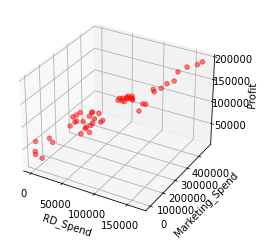

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['RD_Spend'],dataset['Marketing_Spend'],dataset['Profit'],c='red', marker='o', alpha=0.5)
ax.set_xlabel('RD_Spend')
ax.set_ylabel('Marketing_Spend')
ax.set_zlabel('Profit')
plt.show()

In [5]:
# Assigning dependent to X and independent feature to y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [6]:
# Converting the State value into integers through One-Hot encoding 
states=pd.get_dummies(X['State'],drop_first=True)

In [7]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [8]:
# Droping the State feature from training data
X=X.drop('State',axis=1)

# Concat the dummy variables replacement of State
X=pd.concat([X,states],axis=1)

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
# Feeding data to our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predicting the Test results
pred = regressor.predict(X_test)

In [12]:
# Measuring the R Square Score 
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
score

0.931581519915206

The R-Square shows that how much near or far are our data points from best fit line. The more near to 1 mean more data points are close to the best fit line. Its value ranges between 0 to 1.

Text(0, 0.5, 'Profit')

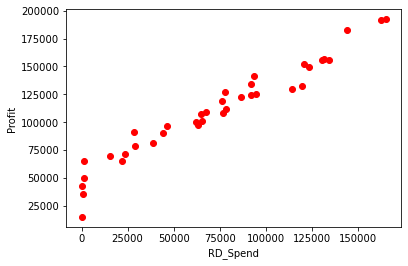

In [13]:
# Plotting the R&D Spend wrt Profit
plt.scatter(X_train["RD_Spend"],y_train ,color = 'red')
plt.xlabel("RD_Spend")
plt.ylabel("Profit")